In [1]:
#import of everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import json
%matplotlib inline

In [2]:
# LaGuardia airport
LGA = [-73.87396590000003,40.7769271];
#load coordinates of regions
regs = pd.read_csv("data//regions.csv",sep=";",index_col='region');

# find bin coordinate
from scipy.stats import binned_statistic_2d

X = np.unique([regs.west,regs.east]);
Y = np.unique([regs.south,regs.north]);

[statistic, xEdge, yEdge, binNum] = binned_statistic_2d([LGA[0]],[LGA[1]], 1,statistic = 'count',
                                                        bins = [X,Y],expand_binnumbers = True);
LGAbin = (binNum[0]-1)*(X.size-1)+binNum[1];

In [5]:
LGAbin

array([1734])

In [4]:
LGAcoord[1] = regs.loc[LGAbin,['west','east']].values.mean();
LGAcoord[0] = regs.loc[LGAbin,['south','north']].values.mean();

NameError: name 'LGAcoord' is not defined

In [74]:
map1 = folium.Map(location= LGAcoord, tiles='Stamen Terrain')
folium.Marker(LGAcoord, popup='LaGuardian').add_to(map1);
map1

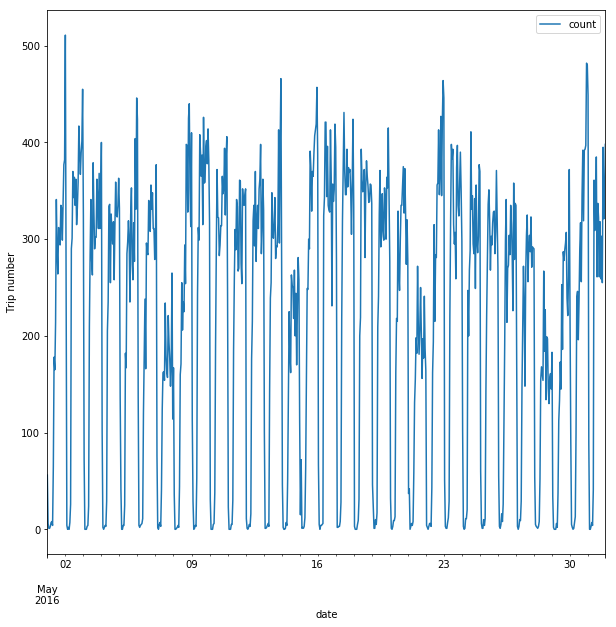

In [80]:
# load data
tripCount = pd.read_pickle('data//May2016-aggregate.pcl');
tripCount.loc[int(LGAbin)].plot(figsize = [10,10]);
plt.ylabel('Trip number');

В ряду отчётливо видны суточная и недельная периодичность